# Como criar uma Wordcloud em Python




Criar uma wordcloud usando Python com a ajuda da biblioteca `wordcloud`. Wordcloud (em português, nuvem de palavras ou nuvem de tags) é um tipo de visualização de dados muito poderoso, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Resumidamente, é como se você estivesse contando a frequência com que cada palavra aparece em um texto. Com essa frequência, você define tamanhos proporcionais às palavras, dispondo elas também em ângulos diferentes.

As palavras maiores são as que apareceram mais no texto, e as menores são as que menos apareceram. Além de ser extremamente útil para análises, é visualmente impactante, agregando valor a qualquer relatório ou *notebook*.

<p align=center><img src="airbnb_summary_wordcloud.png" width="300px"></p>

Na figura acima, eu usei a base de dados disponibilizada pelo Airbnb no seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), e peguei os dados para a cidade de Seatle. Lá é possível baixar um grande volume de dados de diferentes cidades para desenvolver projetos e soluções de *Data Science*.

Basicamente, eu extrai as descrições de todas as casas que estão para alugar, com a finalidade de descobrir quais os termos e palavras mais usados pelos anfitriões do site. Veja como fazer o mesmo neste tutorial.

Se você quiser acompanhar todo o código em Python, basta clicar no botão abaixo para abrir o Jupyter *notebook* no meu Github.



## Importando os dados do Airbnb

Como eu disse, o Airbnb disponibiliza os dados de várias cidades para download. O *dataset* que eu escolhi foi o da figura abaixo. Para te ajudar, eu já fiz o download do *dataset* completo e descompactei o mesmo. Aqui esta o [link para download](http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0).

Este *dataset* tem mais de 110Mb po causa das suas 35.451 entradas e 106 atributos! Vamos importar ele todo, mas como só iremsó vou usar a coluna `summary`, que contém a "propaganda" do dono da casa. Para começar, instale a biblioteca `wordcloud` caso você não tenha, e siga os passos abaixo.



In [1]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importar o arquivo csv em um df
df = pd.read_csv("listings.csv", sep=',')

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

#### Estes são DADOS do Airbnb da cidade de Seatle, na qual eu sempre fui muito curioso. 

Vamos analisar pelo menos um  depoímentos. E também vamos utilizar a biblioteca <b> TextBlob </b>, com ela vamos conseguir realizar uma análise de sentimento em relação a esses apartamentos ou casas no AIRBNB. 

In [9]:
display(summary)

0       Gorgeous, architect remodeled, Dutch Colonial ...
1       This tiny cottage is only 15x10, but it has ev...
2       This beautiful double room features a magical ...
3       The Sweet Orange is a delightful and spacious ...
4       Welcome to my delicious Tangerine Dream!  A co...
                              ...                        
7012      这是一个3房一厅两卫的房子,出租一个独立房间,房子靠近公车站,附近有公园,餐厅､银行､超市等等
7013    Stunning water view. Looking for a refreshing ...
7014    Truly urban living at its finest at this Brand...
7015    Outstanding newer boutique apartment community...
7016    Corner unit with lots of sunlight in heart of ...
Name: summary, Length: 6872, dtype: object

In [21]:
# exemplos de descrições para os imóveis no Airbnb
display(summary.iloc[1])
display(summary.iloc[2])
display(summary.iloc[30])
display(summary.iloc[45])
display(summary.iloc[23])
display(summary.iloc[80])
display(summary.iloc[74])
display(summary.iloc[99])
display(summary.iloc[13])
display(summary.iloc[17])
display(summary.iloc[36])
display(summary.iloc[105])
display(summary.iloc[91])

'This tiny cottage is only 15x10, but it has everything you need..including a garden just outside!  Newer queen bed, down pillows/ duvet, tv, closet w iron and mini board, large dresser, fold down table and chair. The kitchenette has micro, toaster oven, mini fridge, coffee, tea n snacks! ( hot plate too under sink)  The  combo shower, toilet,European style   is across from kitchen separated by a TALL shower curtain.  Our walking score is 95, with 2 neighborhoods w/in a mile, buses on corner.'

'This beautiful double room features a magical sleeping room and a second room that features a sitting area and breakfast /mini kitchen area. On two major bus lines, come enjoy the burgeoning arts district just minutes away from downtown Seattle'

"Your hideout in Seattle! Surround yourself with trees, birds and calm while you visit the Pacific Northwest. Our little bit of country in the city to share. We can't wait to meet you!"

'Dear Guests, My nightly rate is determined by seasonal rating, if you plan on staying a month or three in the future please click ahead to your perspective dates to see the seasonal cost in order to make your plans. Enjoy a home away from home in a quiet family friendly neighborhood. Very private and seamless arrangements. Thank you Edwin'

'This is the top floor of an arts and crafts home in Seattle. 1 master bedroom, 1 kid-size bedroom, 1 bath, deck, private entrance, Air conditioning, WiFi and LAN. There is one spot just as you come inside where a screen provides privacy from the downstairs. Once you are past that area everything is completely private including master bedroom, sitting area, and luxurious master bath.'

'Apartment in the heart of downtown Seattle.  Perfect for business travel or vacations.  Close to conventions centers and shopping.'

"Centrally located lovely townhome with gorgeous views! This listing offers access to the guest bedroom with its own bathroom and access to the living room and kitchen. The unit has one of the best locations in Seattle, two blocks from capitol hill light rail stations and a block from Safeway surrounded some of the city's best eateries and bars."

'Enjoy the excitement of Seattle and city life in a quiet and green retreat at the Center of the Universe- Fremont!'

'Step onto the private balcony of this condo for a peek-a-boo view of Elliott Bay. This lovely and spacious home has been comfortably furnished with vibrant colors throughout. There’s access to a shared rooftop deck, swimming pool, and fitness center. Due to COVID-19 outbreak, pool, hot tub, sauna and gym are closed until further notice. We apologize for the inconvenience.'

"Live like a local in Seattle (Ballard) in your own private place on the first floor of our historic home.  Comfy beds and all you need for your vacation.  Very quiet neighborhood near many important Seattle attractions to include Caffe Fiore, Larsen's Scandinavian Bakery, Ballard Locks, and Golden Gardens Saltwater Beach.  Enjoy your own parking space located just steps from your private entrance and patio. Have a great trip and we hope you will consider our Vacation Rental!"

'Close to: UW Campus, Children’s & UW Hospitals, U Village, Burke-Gilman Trail, Magnuson Park, & Lake Washington; easy 7 minute drive to: I-5 & just 1 exit to Capitol Hill, 2 to Queen Anne & 3 to Downtown; easy walk to: PCC & Metropolitan Markets, & multiple bus routes to: UW Light Rail Station, Downtown, & all of Seattle.'

'It has a Walk Score of 98 out of 100. This location is a Walker’s Paradise so no car is required. Super comfortable, quiet & clean  brick studio. This apt is on the 2nd floor with intercom access. The window view of the  Brooklyn Ave is nice. The Ave, UW Tower, Hotel Deca just across the street.  6-10 min drive to Children Hospital, downtown Seattle,Portage Bay, Lake Union and Eastlake. Easy bus to Amazon or Microsoft. The entrance has CCTV surveillance.'

'THE 5-STAR HOUSE, IS GIVING YOU A SPECIAL PRICE DISCOUNT PER ROOM FOR  THE WINTER AND SPRING UNTIL MAY 31ST 2017 at $85 IN JUNE 1ST 2017, THE PRICE WILL GO BACK TO $90 / NIGHT      $    425PER WEEK      $ 1, 800PER MONTH'

Para conseguir criar uma nuvem de palavras eu preciso juntar todas elas em um único texto.

Para você ter ideia, temos um total de 9.823.645 extraídas da base de dados do Airbnb! Essa massa de volumes pode ser difícil de analisar por manipulação tradicional de dados, mas com a ajuda da wordcloud é possível identificar somente o que de fato importa.

In [22]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 2545078


Agora sim, vamos para a biblioteca `wordcloud`. A primeira etapa consiste em criar uma lista de **stopwords**. Stopwords são basicamente  palavras que devem ser removidas da wordcloud por não agregarem nenhuma informação (no entanto aparecem muito!). Alguns exemplos são *"a", "não", "mas", "and", "I", "not"*, entre outras.

Depois de definir as palavras que serão descartadas, instanciamos um objeto do tipo `WordCloud` e fornecemos os parâmetros como segue abaixo. Agora é só chamar o método `generate()` e a wordcloud será gerada.

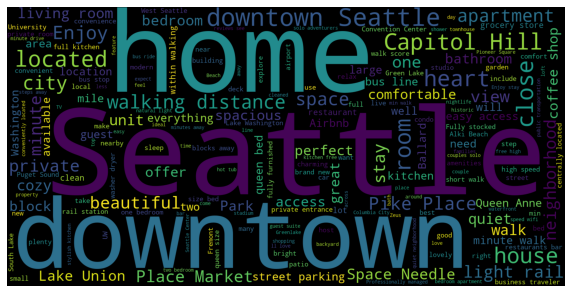

In [23]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["of", "my", "in", "you", "welcome"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

Eu que odeio o calor tenho que concordar com essa nuvem de palavras: ar condicionado é a coisa mais importante para quem aluga uma casa no Rio de Janeiro :)

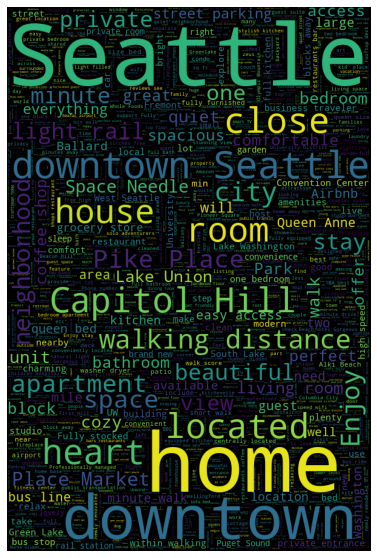

In [7]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("seatle.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

Simples assim. Apenas se certifique que sua imagem realmente apresenta valores em branco e preto para a máscara funcionar.

É possível escolher fonte, tamanho da fonte, quantidade máxima de palavras e cor do fundo.

Espero que tenha gostado deste tutorial. Tenho certeza que na primeira vez que olharem algo do tipo nos seus relatórios você vai escutar algo como "nossa, como você fez isso?!" :)

In [8]:
from textblob import TextBlob as tb

In [10]:
#Variável que irá armazenar as polaridades
analysis = None

In [18]:
summary

0       Gorgeous, architect remodeled, Dutch Colonial ...
1       This tiny cottage is only 15x10, but it has ev...
2       This beautiful double room features a magical ...
3       The Sweet Orange is a delightful and spacious ...
4       Welcome to my delicious Tangerine Dream!  A co...
                              ...                        
7012      这是一个3房一厅两卫的房子,出租一个独立房间,房子靠近公车站,附近有公园,餐厅､银行､超市等等
7013    Stunning water view. Looking for a refreshing ...
7014    Truly urban living at its finest at this Brand...
7015    Outstanding newer boutique apartment community...
7016    Corner unit with lots of sunlight in heart of ...
Name: summary, Length: 6872, dtype: object

In [16]:
summaryss = [] # Lista vazia para armazenar scores
for summarys in summary:
    print(summary)
    analysis = tb(summary)
    polarity = analysis.sentiment.polarity
    summaryss.append(polarity)
    print(polarity)

0       Gorgeous, architect remodeled, Dutch Colonial ...
1       This tiny cottage is only 15x10, but it has ev...
2       This beautiful double room features a magical ...
3       The Sweet Orange is a delightful and spacious ...
4       Welcome to my delicious Tangerine Dream!  A co...
                              ...                        
7012      这是一个3房一厅两卫的房子,出租一个独立房间,房子靠近公车站,附近有公园,餐厅､银行､超市等等
7013    Stunning water view. Looking for a refreshing ...
7014    Truly urban living at its finest at this Brand...
7015    Outstanding newer boutique apartment community...
7016    Corner unit with lots of sunlight in heart of ...
Name: summary, Length: 6872, dtype: object


TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'pandas.core.series.Series'>